## Decision Tree

In [1]:
import pandas as pd
DT_data = pd.read_csv("credit.csv",index_col=0)
DT_data.head(5)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
OBS#,,,,,,,,,,,,,,,,,,,,,
1,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
2,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
3,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
4,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
5,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [2]:
DT_data['RESPONSE'].head(5)

OBS#
1    1
2    0
3    1
4    1
5    0
Name: RESPONSE, dtype: int64

In [3]:
DT_data.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [4]:
DT_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   int6

In [5]:
x_vars = DT_data.iloc[:, :-1]
y_vars = DT_data.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size=0.3, random_state=0)

In [6]:
# Developing decision tree
from sklearn import tree

cl_tree = tree.DecisionTreeClassifier(criterion='gini',
                                         random_state = 100,
                               max_depth=4, min_samples_leaf=15)



cl_tree=cl_tree.fit(X_train, y_train)

pred=cl_tree.predict(X_test)
print(pred)

[0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1]


In [7]:
pd.crosstab(pred,y_test)

RESPONSE,0,1
row_0,,
0,41,31
1,45,183


In [8]:
cols = DT_data.columns[DT_data.columns != 'RESPONSE']

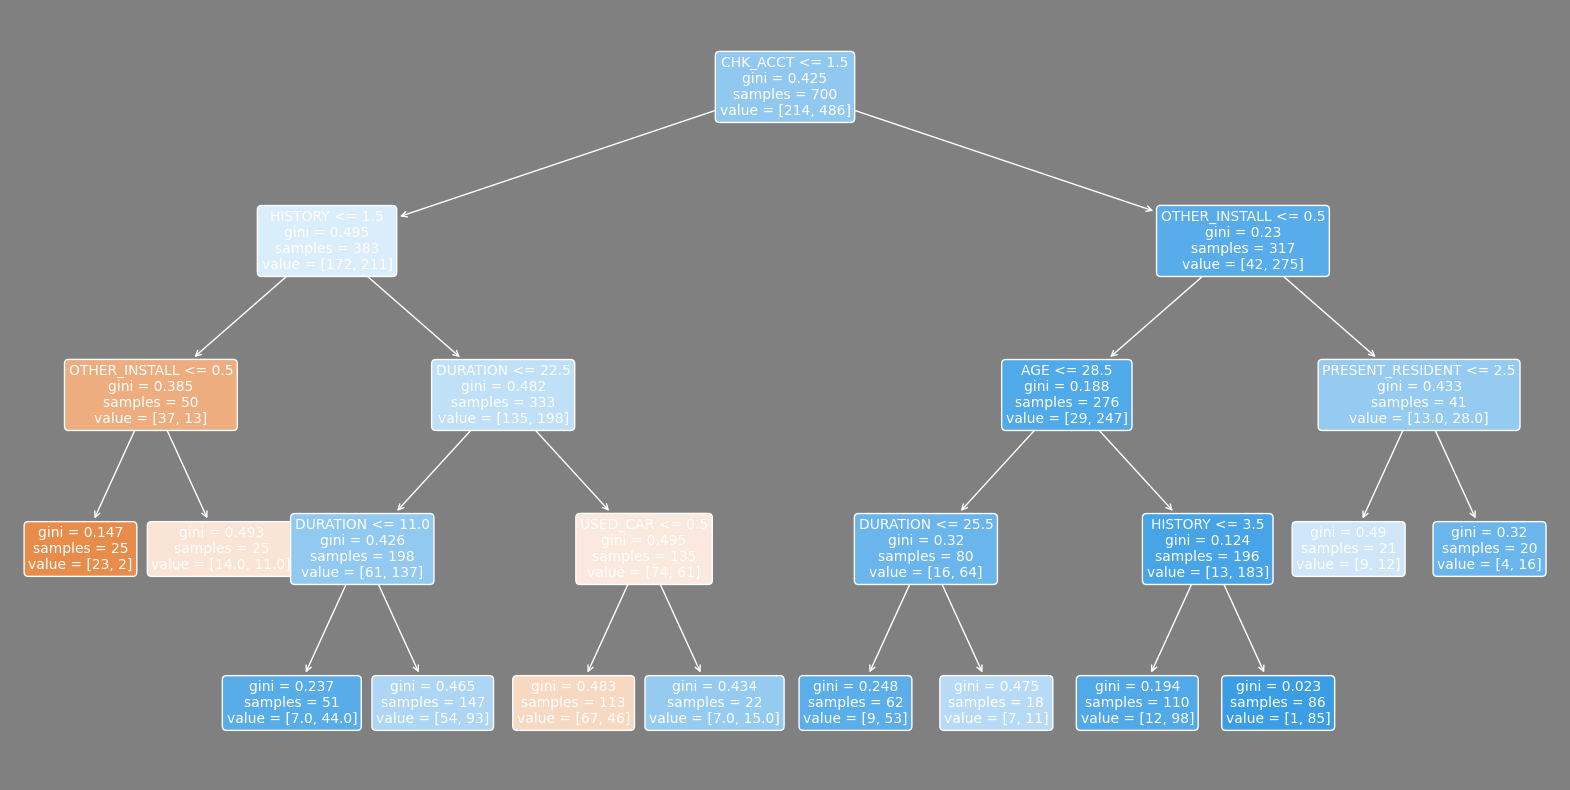

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'cl_tree' is your trained decision tree model
plt.figure(figsize=(20, 10), facecolor='gray')  # Adjust the size and background color
tree.plot_tree(cl_tree, feature_names=cols, filled=True, rounded=True, fontsize=10)
plt.savefig('decision_tree.png', bbox_inches='tight')  # Save the plot as PNG file with tight bounding box
plt.show()
